In [19]:
import numpy as np

In [16]:
from openpyxl import load_workbook
# извлечение массва из файла excel

# wb = load_workbook('tabl_lab.xlsx')
# sheet = wb.active
# mass_db = []
# for i in range(15, 90):
#     a = sheet.cell(row=i, column=1).value
#     if a == None:
#         continue
#     ls = []
#     part = a.split('/')
#     ls.append(int(part[0]))
#     ls.append(int(part[1]))
#     ls.append(100 - (int(part[0]) +int(part[1])))
#     for j in range(2,9):
#         ls.append(float(sheet.cell(row=i, column=j).value))
#     mass_db.append(ls)

In [17]:
# упаковка массива и запись в файл

# import pickle
# s = pickle.dumps(mass_db)
# with open('LAb_data.db', 'wb') as f:
#     f.write(s)

In [21]:
# распаковка массива из файла

import pickle
with open('LAb_data.db', 'rb') as f:
    temp = f.read()
mass_db = pickle.loads(temp)

In [23]:
# ручная проверка извлечения)
# print(mass_db[-1])

In [24]:
from functools import partial

# функция параметр принимает кортеж p(a,b,c), a+b+c=1; где a,b,c - доли веществ. 2й пар-р number отвечает за то,
# какие данные возвращаются(температура, импульс и тд)
# Возвращает значение функции(температура, импульс и тд) в точке с коорд. a,b,c, линейно интерполируя
# исходный массив из EXCELL

def Parametr(p, number):
    
    # 3 - импульс на выходе
    # 4 - температура в кс
    # 5 - доля к-фазы в процентах
    # 6 - плотность
    # 7 - расходный комплекс
    # 8 - энтальпия образования
    # 9 - импульс в пустоте
    
    k = number
    b = p[0]*50 + 50 # нижняя ось (окислитель)
    l = p[2]*50      # левая ось (ГСВ)
                     # правая ось получается автоматически, тк b+l+r=1
     
    x_1 = int((b // 5) * 5)
    x_2 = x_1 + 5
    
    y_1 = int((l // 5) * 5)
    y_2 = y_1 + 5
    
    ch_points = [(x_1, y_1),(x_1, y_2),(x_2, y_1),(x_2, y_2)]
    
    for it in ch_points:
        if it[0] + it[1] > 100:
            ch_points = [(x_1, y_1)]
            break
    
    if len(ch_points) == 4:
        for row in mass_db:
            if (row[0], row[1]) == ch_points[0]:
                P_0 = round(row[k],2)
            if (row[0], row[1]) == ch_points[1]:
                P_1 = round(row[k],2)
            if (row[0], row[1]) == ch_points[2]:
                P_2 = round(row[k],2)
            if (row[0], row[1]) == ch_points[3]:
                P_3 = round(row[k],2)
        P_x = P_0*((x_2-b)*(y_2-l)/25) + P_2*((b-x_1)*(y_2-l)/25) + P_1*((b-x_1)*(l-y_1)/25) + P_3*((x_2-b)*(l-y_1)/25)
    else:
        for row in mass_db:
            if (row[0], row[1]) == ch_points[0]:
                P_x = round(row[k],2)
    return P_x

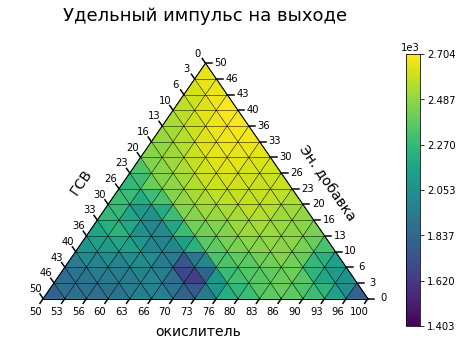

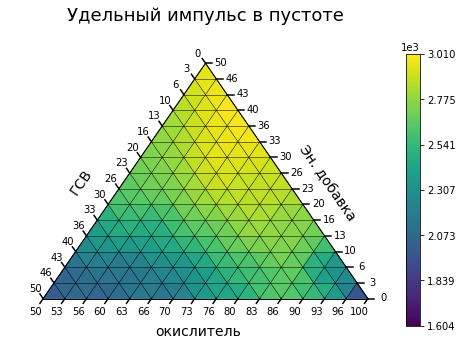

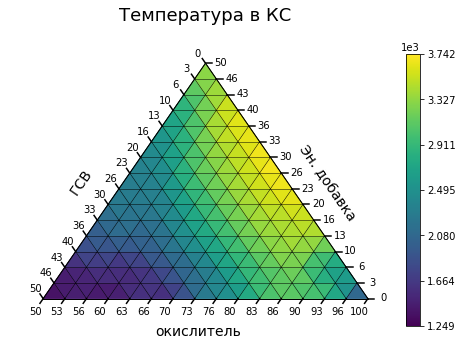

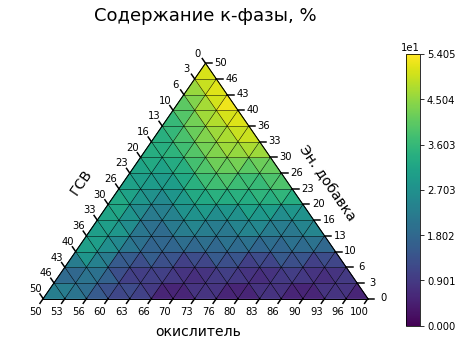

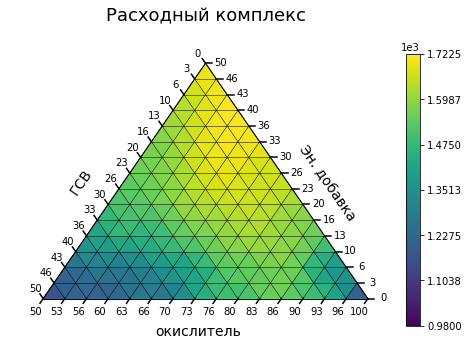

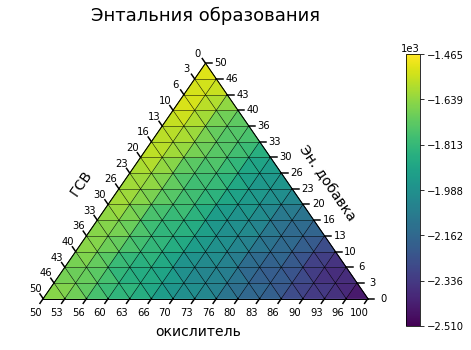

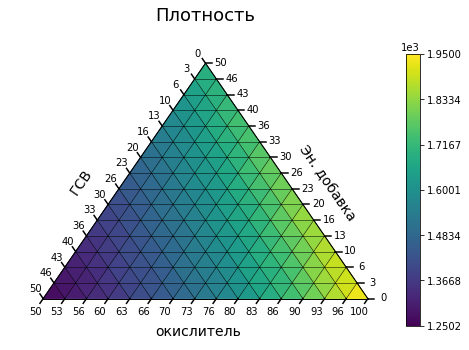

In [25]:
import ternary

# Импульс на выходе
Parametr_mod = partial(Parametr, number=3)

scale = 15

figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(8, 5)

tax.ax.axis("off")
figure.set_facecolor('w')
ttl = tax.ax.title
ttl.set_position([.5, 1.1])

tax.boundary(linewidth=1.0)
tax.gridlines(color="black", multiple=1, linewidth=0.5, ls='-')

# Set Axis labels and Title
fontsize = 14
tax.set_title("Удельный импульс на выходе", fontsize=fontsize + 4)
tax.left_axis_label("ГСВ", fontsize=fontsize, offset=0.14)
tax.right_axis_label("Эн. добавка", fontsize=fontsize, offset=0.13)
tax.bottom_axis_label("окислитель", fontsize=fontsize, offset=0.08)

tax.set_axis_limits({'b': [50, 100], 'l': [0, 50], 'r': [0, 50]})
# get and set the custom ticks:
tax.get_ticks_from_axis_limits()
tax.set_custom_ticks(fontsize=10, offset=0.02)
# tax.heatmapf(density, boundary=True, style="triangular")
tax.heatmapf(Parametr_mod, boundary=True, style="triangular")

###########

# Импульс в пустоте
Parametr_mod = partial(Parametr, number=9)

scale = 15

figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(8, 5)

tax.ax.axis("off")
figure.set_facecolor('w')
ttl = tax.ax.title
ttl.set_position([.5, 1.1])

tax.boundary(linewidth=1.0)
tax.gridlines(color="black", multiple=1, linewidth=0.5, ls='-')

# Set Axis labels and Title
fontsize = 14
tax.set_title("Удельный импульс в пустоте", fontsize=fontsize + 4)
tax.left_axis_label("ГСВ", fontsize=fontsize, offset=0.14)
tax.right_axis_label("Эн. добавка", fontsize=fontsize, offset=0.13)
tax.bottom_axis_label("окислитель", fontsize=fontsize, offset=0.08)

tax.set_axis_limits({'b': [50, 100], 'l': [0, 50], 'r': [0, 50]})
# get and set the custom ticks:
tax.get_ticks_from_axis_limits()
tax.set_custom_ticks(fontsize=10, offset=0.02)
# tax.heatmapf(density, boundary=True, style="triangular")
tax.heatmapf(Parametr_mod, boundary=True, style="triangular")

####################

# Температура в КС
Parametr_mod = partial(Parametr, number=4)

scale = 15

figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(8, 5)

tax.ax.axis("off")
figure.set_facecolor('w')
ttl = tax.ax.title
ttl.set_position([.5, 1.1])

tax.boundary(linewidth=1.0)
tax.gridlines(color="black", multiple=1, linewidth=0.5, ls='-')

# Set Axis labels and Title
fontsize = 14
tax.set_title("Температура в КС", fontsize=fontsize + 4)
tax.left_axis_label("ГСВ", fontsize=fontsize, offset=0.14)
tax.right_axis_label("Эн. добавка", fontsize=fontsize, offset=0.13)
tax.bottom_axis_label("окислитель", fontsize=fontsize, offset=0.08)

tax.set_axis_limits({'b': [50, 100], 'l': [0, 50], 'r': [0, 50]})
# get and set the custom ticks:
tax.get_ticks_from_axis_limits()
tax.set_custom_ticks(fontsize=10, offset=0.02)
# tax.heatmapf(density, boundary=True, style="triangular")
tax.heatmapf(Parametr_mod, boundary=True, style="triangular")

############

# Содержание К-фазы
Parametr_mod = partial(Parametr, number=5)

scale = 15

figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(8, 5)

tax.ax.axis("off")
figure.set_facecolor('w')
ttl = tax.ax.title
ttl.set_position([.5, 1.1])

tax.boundary(linewidth=1.0)
tax.gridlines(color="black", multiple=1, linewidth=0.5, ls='-')

# Set Axis labels and Title
fontsize = 14
tax.set_title("Содержание к-фазы, %", fontsize=fontsize + 4)
tax.left_axis_label("ГСВ", fontsize=fontsize, offset=0.14)
tax.right_axis_label("Эн. добавка", fontsize=fontsize, offset=0.13)
tax.bottom_axis_label("окислитель", fontsize=fontsize, offset=0.08)

tax.set_axis_limits({'b': [50, 100], 'l': [0, 50], 'r': [0, 50]})
# get and set the custom ticks:
tax.get_ticks_from_axis_limits()
tax.set_custom_ticks(fontsize=10, offset=0.02)
# tax.heatmapf(density, boundary=True, style="triangular")
tax.heatmapf(Parametr_mod, boundary=True, style="triangular")

################

# расходный комплекс
Parametr_mod = partial(Parametr, number=7)

scale = 15

figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(8, 5)

tax.ax.axis("off")
figure.set_facecolor('w')
ttl = tax.ax.title
ttl.set_position([.5, 1.1])

tax.boundary(linewidth=1.0)
tax.gridlines(color="black", multiple=1, linewidth=0.5, ls='-')

# Set Axis labels and Title
fontsize = 14
tax.set_title("Расходный комплекс", fontsize=fontsize + 4)
tax.left_axis_label("ГСВ", fontsize=fontsize, offset=0.14)
tax.right_axis_label("Эн. добавка", fontsize=fontsize, offset=0.13)
tax.bottom_axis_label("окислитель", fontsize=fontsize, offset=0.08)

tax.set_axis_limits({'b': [50, 100], 'l': [0, 50], 'r': [0, 50]})
# get and set the custom ticks:
tax.get_ticks_from_axis_limits()
tax.set_custom_ticks(fontsize=10, offset=0.02)
# tax.heatmapf(density, boundary=True, style="triangular")
tax.heatmapf(Parametr_mod, boundary=True, style="triangular")

###########

# Энтальния
Parametr_mod = partial(Parametr, number=8)

scale = 15

figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(8, 5)

tax.ax.axis("off")
figure.set_facecolor('w')
ttl = tax.ax.title
ttl.set_position([.5, 1.1])

tax.boundary(linewidth=1.0)
tax.gridlines(color="black", multiple=1, linewidth=0.5, ls='-')

# Set Axis labels and Title
fontsize = 14
tax.set_title("Энтальния образования", fontsize=fontsize + 4)
tax.left_axis_label("ГСВ", fontsize=fontsize, offset=0.14)
tax.right_axis_label("Эн. добавка", fontsize=fontsize, offset=0.13)
tax.bottom_axis_label("окислитель", fontsize=fontsize, offset=0.08)

tax.set_axis_limits({'b': [50, 100], 'l': [0, 50], 'r': [0, 50]})
# get and set the custom ticks:
tax.get_ticks_from_axis_limits()
tax.set_custom_ticks(fontsize=10, offset=0.02)
# tax.heatmapf(density, boundary=True, style="triangular")
tax.heatmapf(Parametr_mod, boundary=True, style="triangular")

#############

# Плотность
Parametr_mod = partial(Parametr, number=6)

scale = 15

figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(8, 5)

tax.ax.axis("off")
figure.set_facecolor('w')
ttl = tax.ax.title
ttl.set_position([.5, 1.1])

tax.boundary(linewidth=1.0)
tax.gridlines(color="black", multiple=1, linewidth=0.5, ls='-')

# Set Axis labels and Title
fontsize = 14
tax.set_title("Плотность", fontsize=fontsize + 4)
tax.left_axis_label("ГСВ", fontsize=fontsize, offset=0.14)
tax.right_axis_label("Эн. добавка", fontsize=fontsize, offset=0.13)
tax.bottom_axis_label("окислитель", fontsize=fontsize, offset=0.08)

tax.set_axis_limits({'b': [50, 100], 'l': [0, 50], 'r': [0, 50]})
# get and set the custom ticks:
tax.get_ticks_from_axis_limits()
tax.set_custom_ticks(fontsize=10, offset=0.02)
# tax.heatmapf(density, boundary=True, style="triangular")
tax.heatmapf(Parametr_mod, boundary=True, style="triangular")

ternary.plt.show()